In [13]:
#########################################
# CNN on MNIST Number Dataset
# By Giriraj Vaishnav
#########################################

In [14]:
# Importing the necessary libraries

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [15]:
# Set the seed for reproducibility and load the data MNIST dataset

seed=10
np.random.seed(seed)
(X_train,y_train), (X_test, y_test)= mnist.load_data()

In [16]:
# Convert the data into float values

X_train=X_train.reshape(X_train.shape[0], 1,28,28).astype('float32')
X_test=X_test.reshape(X_test.shape[0], 1,28,28).astype('float32')

In [17]:
# Normalize the data

X_train=X_train/255
X_test=X_test/255
y_train= np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)
num_classes=y_train.shape[1]
print(num_classes)

10


In [18]:
# Training the CNN model 

model=Sequential()
model.add(Conv2D(32,5,5, padding='same',input_shape=(1,28,28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
H = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 3s - loss: 0.8074 - accuracy: 0.7508 - val_loss: 0.3084 - val_accuracy: 0.9072
Epoch 2/10
300/300 - 2s - loss: 0.3496 - accuracy: 0.8912 - val_loss: 0.2203 - val_accuracy: 0.9343
Epoch 3/10
300/300 - 2s - loss: 0.2825 - accuracy: 0.9130 - val_loss: 0.1778 - val_accuracy: 0.9447
Epoch 4/10
300/300 - 2s - loss: 0.2511 - accuracy: 0.9223 - val_loss: 0.1560 - val_accuracy: 0.9525
Epoch 5/10
300/300 - 2s - loss: 0.2234 - accuracy: 0.9303 - val_loss: 0.1410 - val_accuracy: 0.9550
Epoch 6/10
300/300 - 2s - loss: 0.2058 - accuracy: 0.9361 - val_loss: 0.1236 - val_accuracy: 0.9615
Epoch 7/10
300/300 - 2s - loss: 0.1934 - accuracy: 0.9400 - val_loss: 0.1154 - val_accuracy: 0.9650
Epoch 8/10
300/300 - 2s - loss: 0.1812 - accuracy: 0.9427 - val_loss: 0.1129 - val_accuracy: 0.9643
Epoch 9/10
300/300 - 2s - loss: 0.1743 - accuracy: 0.9453 - val_loss: 0.1035 - val_accuracy: 0.9674
Epoch 10/10
300/300 - 2s - loss: 0.1660 - accuracy: 0.9473 - val_loss: 0.1014 - val_accuracy: 0.9687

In [19]:
# Evaluating the model

score= model.evaluate(X_test, y_test, verbose=0)
print('The error is: %.2f%%'%(100-score[1]*100))

The error is: 3.13%


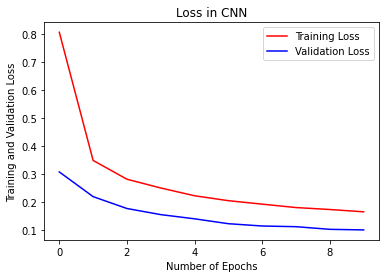

In [20]:
# Ploting the graph for Training and Validation Loss

from matplotlib import pyplot as plt
plt.plot(range(0,10), H.history["loss"], "r", label = "Training Loss")
plt.plot(range(0,10), H.history["val_loss"], "b", label = "Validation Loss")
plt.title("Loss in CNN")
plt.legend(loc = "upper right")
plt.xlabel("Number of Epochs")
plt.ylabel("Training and Validation Loss")
plt.show()

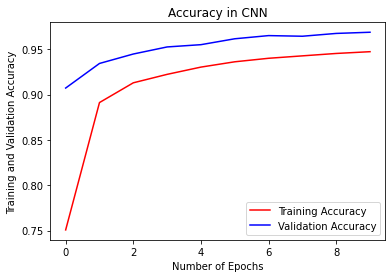

In [21]:
# Ploting the graph for Training and Validation Accuracy

from matplotlib import pyplot as plt
plt.plot(range(0,10), H.history["accuracy"], "r", label = "Training Accuracy")
plt.plot(range(0,10), H.history["val_accuracy"], "b", label = "Validation Accuracy")
plt.title("Accuracy in CNN")
plt.legend(loc = "lower right")
plt.xlabel("Number of Epochs")
plt.ylabel("Training and Validation Accuracy")
plt.show()

In [22]:
# Predicting the Test Set

pred_labels = model.predict_classes(X_test)
print(pred_labels)
test_label = np.argmax(y_test, axis=1)
print(test_label)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [24]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test_label, pred_labels)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[ 965    0    1    1    0    1    7    1    3    1]
 [   0 1119    5    3    1    0    1    0    6    0]
 [   1    0 1008    9    1    1    2    7    3    0]
 [   0    0   11  975    0    5    0   11    4    4]
 [   2    0    1    0  954    0    2    5    2   16]
 [   3    2    1   19    3  849    6    1    5    3]
 [   7    2    2    0    3    4  937    1    2    0]
 [   0    1   14    2    8    1    1  989    1   11]
 [   3    1    2   18    2    4    9    4  929    2]
 [   2    5    2   10   15    2    0    8    3  962]]


In [25]:
# Classification report for precision, recall f1-score and accuracy

from sklearn.metrics import classification_report

report = classification_report(test_label,pred_labels)
print('Classification report : \n',report)

Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.94      0.97      0.95      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.95      0.97       892
           6       0.97      0.98      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

